<a href="https://colab.research.google.com/github/GonsalesAlisson/Projects/blob/develop/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alisson Vinicius Gonsales - 10728320**

# **Segmentação dos dados e formulação do problema**

Precisamos desenvolver um modelo de classificação para um conjunto de dados de sobrevivência dos viajantes do Titanic. Os atributos disponíveis são:

1 - **PassengerId**: Número de identificação do passageiro;

2 - **Survived**: Indica se o passageiro sobreviveu ao desastre. É atribuído o valor de 0 para aqueles que não sobreviveram, e 1 para quem sobreviveu;

3 - **Pclass**: Classe na qual o passageiro viajou. É informado 1 para primeira classe; 2 para segunda; e 3 para terceira;

4 - **Name**: Nome do passageiro;

5 - **Sex**: Sexo do passageiro;

6 - **Age**: Idade do passageiro em anos;

7 - **SibSp**: Quantidade de irmãos e cônjuges a bordo;

8 - **Parch**: Quantidade de pais e filhos a bordo;

9 - **Ticket**: Número da passagem;

10 - **Fare**: Preço da passagem;

11 - **Cabin**: Número da cabine do passageiro;

12 - **Embarked**: Indica o porto no qual o passageiro embarcou. Há apenas três valores possíveis: Cherbourg, Queenstown e Southampton, indicados pelas letras “C”, “Q” e “S”, respectivamente.



**O objetivo é predizer o valor da variável Survived, que indica se o passageiro sobreviveu ou não, no conjunto de teste.** Primeiro, importamos os dados de treinamento e teste.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

In [ ]:
train = pd.read_csv("train.csv", header=(0))
test = pd.read_csv("test.csv", header=(0))

In [ ]:
print("Número de registros e atributos na base de treino: ", train.shape)
print("Número de registros e atributos na base de teste: ", test.shape)

Número de registros e atributos na base de treino:  (891, 12)
Número de registros e atributos na base de teste:  (418, 11)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Os dados de teste não contém a informação da variável resposta. Esta é obtida submetendo o modelo no Kaggle.

# **Pré-processamento dos dados**

Primeiro, removemos algumas variáveis que não são preditoras:

In [ ]:
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
PassId_test = test['PassengerId']
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


A seguir, elaboraremos uma estratégia para lidar com os valores faltantes:

In [ ]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

Vemos que a variável Age é a com maior número de faltantes. A seguir, estudaremos a distribuição dessa variável nos dados.

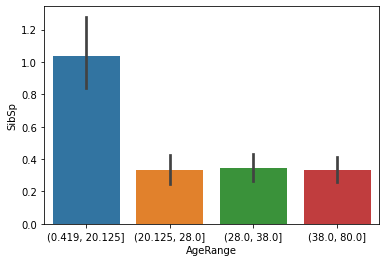

In [ ]:
train['AgeRange'] = pd.qcut(train['Age'], 4)
 
sns.barplot(x ='AgeRange', y ='SibSp',
data = train)
train.drop('AgeRange',axis=1,inplace=True)

O primeiro quartil da variável Idade (0 - 20 anos) tem uma probabilidade maior de ter irmãos e conjuges a bordo. Abaixo, vemos que a probabilidade de ter pais e filhos a bordo é diferente no primeiro e último quartil.

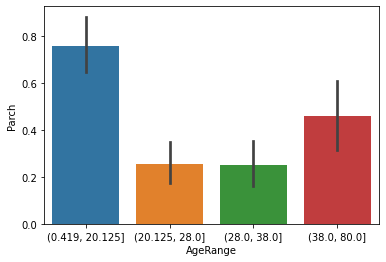

In [ ]:
train['AgeRange'] = pd.qcut(train['Age'], 4)
 
sns.barplot(x ='AgeRange', y ='Parch',
data = train)
train.drop('AgeRange',axis=1,inplace=True)

Abaixo vemos que os dois últimos quartis da variável Age tem maior probabilidade de ter pago mais pela passagem. Além disso, encontramos correlações entre a classe do passageiro e sua idade.

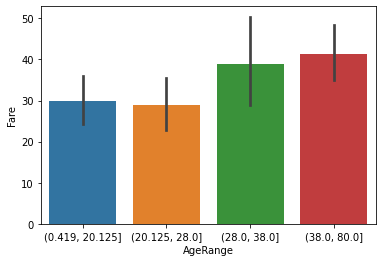

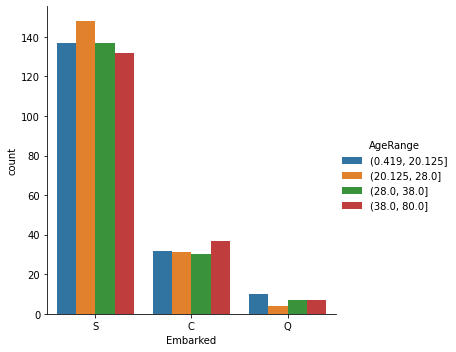

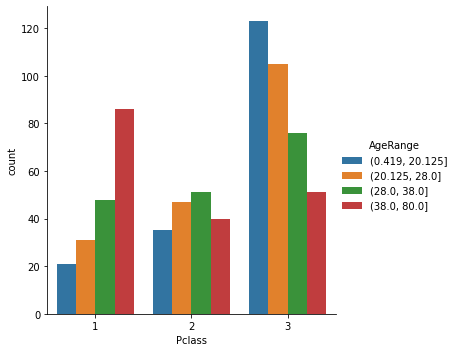

In [ ]:
train['AgeRange'] = pd.qcut(train['Age'], 4)
 
sns.barplot(x ='AgeRange', y ='Fare',
data = train)
sns.catplot(x ="Embarked", hue ="AgeRange",
kind ="count", data = train)
sns.catplot(x ="Pclass", hue ="AgeRange",
kind ="count", data = train)
train.drop('AgeRange',axis=1,inplace=True)

Verificando a presença de dados faltantes nos atributos, vemos que estes representam muitas observações para ser descartadas. Optaremos por uma estratégia de imputação usando o KNNImputer da biblioteca sklearn. **As variáveis a serem consideradas para medir as distâncias no método KNN e encontrar as idades serão SibSp (Se  a pessoa tem irmãos e conjuges a bordo), Parch(Quantidade de pais e filhos a bordo),Pclass(classe do passageiro) e  Fare(Renda)..** Tomando o cuidado de remover a variável resposta. 

Primeiro, transformamos a variável Pclass com um OneHotEncoder(A distância entre as classes 1 e 2 não pode ser menor que a entre 1 e 3, para o sucesso do método).

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(np.array(train['Pclass']).reshape(len(train),1))
onehot_encoded_test = onehot_encoder.fit_transform(np.array(test['Pclass']).reshape(len(test),1))

train['Pclass_1'] = onehot_encoded[:,0]
train['Pclass_2'] = onehot_encoded[:,1]
train['Pclass_3'] = onehot_encoded[:,2]
test['Pclass_1'] = onehot_encoded_test[:,0]
test['Pclass_2'] = onehot_encoded_test[:,1]
test['Pclass_3'] = onehot_encoded_test[:,2]

In [ ]:
data_impute_train = train.drop(['Survived','Embarked','Sex','Pclass'],axis=1,inplace=False)
data_impute_test = test.drop(['Embarked','Sex','Pclass'],axis=1,inplace=False)

In [ ]:
data_impute_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0.0,0.0,1.0
1,38.0,1,0,71.2833,1.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0
3,35.0,1,0,53.1000,1.0,0.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0


Em seguida imputamos os atributos numéricos com o KNNImputer, considerando os 3 vizinhos mais próximos.

In [ ]:
from sklearn.impute import KNNImputer
n = 3 #Número de vizinhos mais próximos para a imputação
imputer = KNNImputer(n_neighbors=n)
train_2 = pd.DataFrame(imputer.fit_transform(data_impute_train), columns=data_impute_train.columns)
test_2 = pd.DataFrame(imputer.fit_transform(data_impute_test),columns=data_impute_test.columns)

In [ ]:
train_2.isna().sum()

Age         0
SibSp       0
Parch       0
Fare        0
Pclass_1    0
Pclass_2    0
Pclass_3    0
dtype: int64

In [ ]:
test_2.isna().sum()

Age         0
SibSp       0
Parch       0
Fare        0
Pclass_1    0
Pclass_2    0
Pclass_3    0
dtype: int64

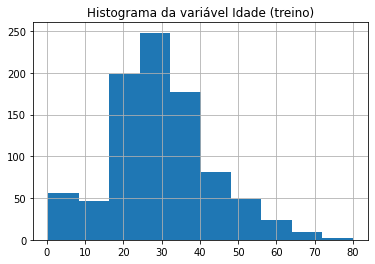

In [ ]:
train_2['Age'].hist()
plt.title("Histograma da variável Idade (treino)")
plt.show()

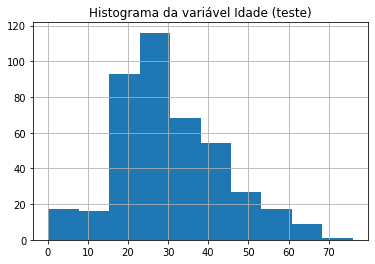

In [ ]:
test_2['Age'].hist()
plt.title("Histograma da variável Idade (teste)")
plt.show()

In [ ]:
train['Age'] = train_2['Age']
test['Age'] = test_2['Age']
#train['Age'] = train['Age'].fillna(train['Age'].mean())
#test['Age'] = test['Age'].fillna(test['Age'].mean())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
train_2['Survived'] = train['Survived']
train_2['Sex'] = train['Sex']

In [ ]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Pclass_1    0
Pclass_2    0
Pclass_3    0
dtype: int64

In [ ]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Pclass_1    0
Pclass_2    0
Pclass_3    0
dtype: int64

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,3,male,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,0.0,1.0


# **Análise descritiva**

## **Análise preliminar**

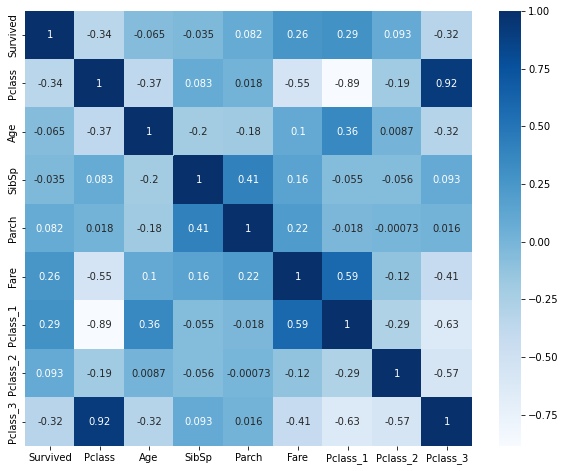

In [ ]:
corr = train.corr()
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

Vemos que não há correlações muito fortes entre os dados considerados no geral. Abaixo, vemos que a variável resposta está razoavelmente correlacionada com o sexo e a classe do passageiro. 

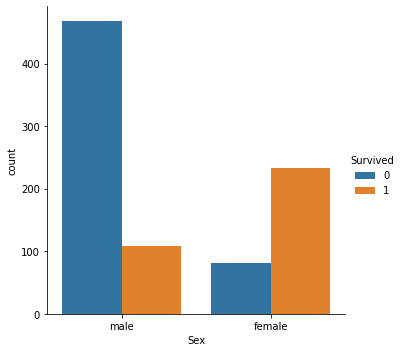

In [ ]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train)

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
print('Mutual information score:', 
      normalized_mutual_info_score(train['Sex'], train['Survived'], average_method='arithmetic'))

Mutual information score: 0.22948881562298293


Pela contagem acima, vemos que entre os homens, a maior parte dos passageiros é de não-sobreviventes, enquanto entre as mulheres a maioria dos passageiros sobreviveu ao Titanic. Além disso, há um desbalanceamento entre homens não-sobreviventes e mulheres sobreviventes, replicando o desbalanceamento na variável resposta.

Abaixo vemos que também há diferenças na proporção de sobreviventes em cada classe do navio e uma maior chance de não sobrevivência para passageiros na terceira classe.

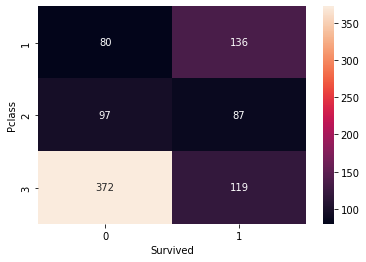

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

group = train.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

Também há uma maioria de passageiros que embarcaram na localidade S, dentre os quais há uma maioria de não-sobreviventes.

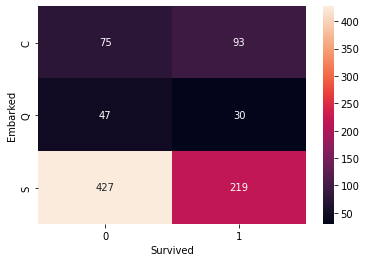

In [ ]:

group = train.groupby(['Embarked', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

Vemos que o preço da passagem é um fator de influência para a probabilidade de sobrevivência, abaixo. Com os quartis mais altos da passagem sendo associados a uma maior taxa de sobrevivência.

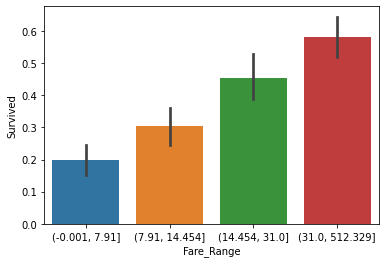

In [ ]:
train['Fare_Range'] = pd.qcut(train['Fare'], 4)
test['Fare_Range'] = pd.qcut(test['Fare'],4)
sns.barplot(x ='Fare_Range', y ='Survived',
data = train)

A diferença na taxa de sobrevivência para os diferentes quartis de idades é sútil, embora seja menor para a faixa 22-29 anos e 36-80 anos

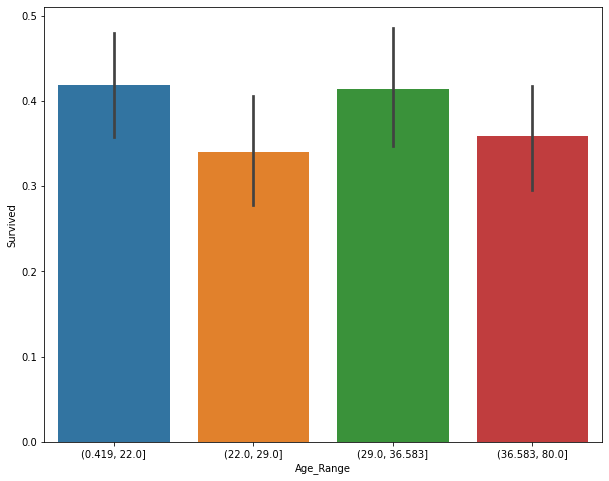

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
train['Age_Range'] = pd.qcut(train['Age'],4)
test['Age_Range'] = pd.qcut(test['Age'],4)
sns.barplot(x ='Age_Range', y ='Survived',
data = train)

A soma das variáveis SibSp e Parch dá o número total de parentes do passageiro no navio. Podemos também criar uma variável binária indicando se o passageiro tem família ou não:

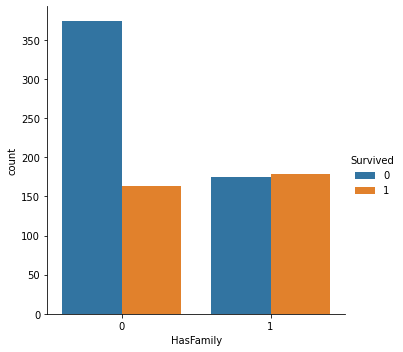

In [ ]:
train['Parentes'] = train['SibSp'] + train['Parch']
test['Parentes'] = test['SibSp'] + test['Parch']
train['HasFamily'] = [int(x>0) for x in train['Parentes']]
test['HasFamily'] = [int(x>0) for x in test['Parentes']]
sns.catplot(x ="HasFamily", hue ="Survived",
kind ="count", data = train)
#train.drop('Parentes',axis=1,inplace=True)
#test.drop('Parentes',axis=1,inplace=True)

Somando 1 a variável 'Parentes', temos o total de passageiros que embarcaram com aquela passagem, e podemos corrigir o valor da passagem com base no número de passageiros que embarcaram através dela.

In [ ]:
train['Parentes'] = train['Parentes'] + 1
test['Parentes'] = test['Parentes']+1

In [ ]:
train['Fare_per_Passenger'] = train['Fare']/train['Parentes']
test['Fare_per_Passenger'] = test['Fare']/test['Parentes']

Se repetirmos as análises dos quartis contra a probabilidade de sobrevivência, temos um padrão diferente do que teríamos considerando apenas a renda.

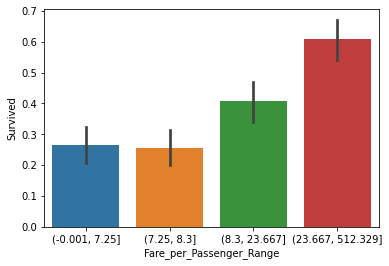

In [ ]:
#train['Fare_Range'] = pd.qcut(train['Fare'], 2)
train['Fare_per_Passenger_Range'] = pd.qcut(train['Fare_per_Passenger'],4)
test['Fare_per_Passenger_Range'] = pd.qcut(test['Fare_per_Passenger'],4)
#test['Fare_Range'] = pd.qcut(test['Fare'],2)
sns.barplot(x ='Fare_per_Passenger_Range', y ='Survived',
data = train)
train['Fare_Range'] = train['Fare_per_Passenger_Range']
test['Fare_Range'] = test['Fare_per_Passenger_Range']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


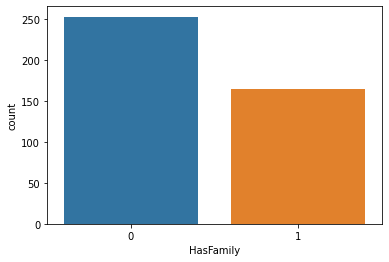

In [ ]:
sns.countplot(test['HasFamily'])

Vamos criar variáveis para indicar em qual quartil de idade/renda o passageiro se encontra.

In [ ]:
age_range = np.unique(train['Age_Range'])
fare_range = np.unique(train['Fare_Range'])

In [ ]:
age_range

array([Interval(0.419, 22.0, closed='right'),
       Interval(22.0, 29.0, closed='right'),
       Interval(29.0, 36.583, closed='right'),
       Interval(36.583, 80.0, closed='right')], dtype=object)

In [ ]:
fare_range

array([Interval(-0.001, 7.25, closed='right'),
       Interval(7.25, 8.3, closed='right'),
       Interval(8.3, 23.667, closed='right'),
       Interval(23.667, 512.329, closed='right')], dtype=object)

In [ ]:
age_range_test = np.unique(test['Age_Range'])
fare_range_test = np.unique(test['Fare_Range'])

In [ ]:
age_range_test

array([Interval(0.169, 22.0, closed='right'),
       Interval(22.0, 28.0, closed='right'),
       Interval(28.0, 38.833, closed='right'),
       Interval(38.833, 76.0, closed='right')], dtype=object)

In [ ]:
fare_range_test

array([Interval(-0.001, 7.634, closed='right'),
       Interval(7.634, 8.662, closed='right'),
       Interval(8.662, 26.0, closed='right'),
       Interval(26.0, 262.375, closed='right')], dtype=object)

Os valores limite no conjunto de treino e teste para os ranges das variáveis Age e Fare coincidem. Agora, criamos as classes:

In [ ]:
train['Age_Class'] = [np.argwhere(age_range==x)[0][0]+1 for x in train['Age_Range']]
train['Fare_Class'] = [np.argwhere(fare_range==x)[0][0]+1 for x in train['Fare_Range']]

In [ ]:
test['Age_Class'] = [np.argwhere(age_range_test==x)[0][0]+1 for x in test['Age_Range']]
test['Fare_Class'] = [np.argwhere(fare_range_test==x)[0][0]+1 for x in test['Fare_Range']]

## **Transformações finais**

Usaremos o OneHotEncoder agora para transformar os dados com essas novas variáveis.

In [ ]:
y_train = np.array(train['Survived'])

In [ ]:
train.drop(['Fare_Range','Age_Range','Survived','Fare_per_Passenger_Range'],axis=1,inplace=True)
test.drop(['Fare_Range','Age_Range','Fare_per_Passenger_Range'],axis=1,inplace=True)

In [ ]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(np.array(train['Age_Class']).reshape(len(train),1))
onehot_encoded_test = onehot_encoder.fit_transform(np.array(test['Age_Class']).reshape(len(test),1))
train['Age_Class_1'] = onehot_encoded[:,0]
train['Age_Class_2'] = onehot_encoded[:,1]
train['Age_Class_3'] = onehot_encoded[:,2]
train['Age_Class_4'] = onehot_encoded[:,3]
#train['Age_Class_5'] = onehot_encoded[:,4]
test['Age_Class_1'] = onehot_encoded_test[:,0]
test['Age_Class_2'] = onehot_encoded_test[:,1]
test['Age_Class_3'] = onehot_encoded_test[:,2]
test['Age_Class_4'] = onehot_encoded_test[:,3]
#test['Age_Class_5'] = onehot_encoded_test[:,4]
onehot_encoded2 = onehot_encoder.fit_transform(np.array(train['Fare_Class']).reshape(len(train),1))
onehot_encoded2_test = onehot_encoder.fit_transform(np.array(test['Fare_Class']).reshape(len(test),1))
train['Fare_Class_1'] = onehot_encoded2[:,0]
train['Fare_Class_2'] = onehot_encoded2[:,1]
train['Fare_Class_3'] = onehot_encoded2[:,2]
train['Fare_Class_4'] = onehot_encoded2[:,3]
test['Fare_Class_1'] = onehot_encoded2_test[:,0]
test['Fare_Class_2'] = onehot_encoded2_test[:,1]
test['Fare_Class_3'] = onehot_encoded2_test[:,2]
test['Fare_Class_4'] = onehot_encoded2_test[:,3]

#onehot_encoded3 = onehot_encoder.fit_transform(np.array(train['Pclass']).reshape(len(train),1))
#onehot_encoded3_test = onehot_encoder.fit_transform(np.array(test['Pclass']).reshape(len(test),1))
#train['Pclass_1'] = onehot_encoded3[:,0]
#train['Pclass_2'] = onehot_encoded3[:,1]
#train['Pclass_3'] = onehot_encoded3[:,2]
#test['Pclass_1'] = onehot_encoded3_test[:,0]
#test['Pclass_2'] = onehot_encoded3_test[:,1]
#test['Pclass_3'] = onehot_encoded3_test[:,2]
#train.drop(['Fare_Class','Age_Class','Pclass'],axis=1,inplace=True)
test.drop(['Fare_Class','Age_Class','Pclass'],axis=1,inplace=True)

In [ ]:
train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Parentes', 'HasFamily', 'Fare_per_Passenger', 'Age_Class',
       'Fare_Class', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age_Class_1', 'Age_Class_2', 'Age_Class_3',
       'Age_Class_4', 'Fare_Class_1', 'Fare_Class_2', 'Fare_Class_3',
       'Fare_Class_4'],
      dtype='object')

## **Padronização dos dados numéricos**

Na célula abaixo, os atributos não-dummies são padronizados.

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
numeric_features = ['Age','Fare_per_Passenger']

In [ ]:
scaler = StandardScaler().fit(train.loc[:,numeric_features])

In [ ]:
train.loc[:,numeric_features] = scaler.transform(train.loc[:,numeric_features])
test.loc[:,numeric_features] = scaler.transform(test.loc[:,numeric_features])
for feature in numeric_features:
  print("\n",feature, ": ")
  print("Média(Treino): ", train[feature].mean())
  print("Std(Treino): ", train[feature].std())
  print("Média(Teste): ", test[feature].mean())
  print("Std(Teste): ", test[feature].std())


 Age : 
Média(Treino):  -9.968332432100171e-17
Std(Treino):  1.0005616400330457
Média(Teste):  0.028962335987938383
Std(Teste):  0.9829196074113096

 Fare_per_Passenger : 
Média(Treino):  -2.990499729630051e-17
Std(Treino):  1.0005616400330457
Média(Teste):  0.05362351699135247
Std(Teste):  0.9939222569420086


## **Análise de Associação**

Nesta seção, tentaremos extrair regras de associação entre as variáveis binárias que temos. Através do algoritmo apriori, é possível selecionar regras com bom suporte nos dados e alta confiança.

In [ ]:
train['Survived'] = y_train

In [ ]:
target_columns = train.drop(['Fare_per_Passenger','SibSp','Parch','Age','Parentes'],axis=1).columns
target_columns

Index(['Pclass', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'HasFamily',
       'Age_Class', 'Fare_Class', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Age_Class_1', 'Age_Class_2', 'Age_Class_3',
       'Age_Class_4', 'Fare_Class_1', 'Fare_Class_2', 'Fare_Class_3',
       'Fare_Class_4', 'Survived'],
      dtype='object')

In [ ]:
transac_list = []
for i in range(len(train)):
  true_features = []
  for feature in target_columns:
    if(train.loc[i,feature]==1):
      true_features.append(feature)
  transac_list.append([feature for feature in true_features])

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transac_list).transform(transac_list)

In [ ]:
transaction_group = pd.DataFrame(te_ary, columns=te.columns_)
transaction_group.head()

,Age_Class,Age_Class_1,Age_Class_2,Age_Class_3,Age_Class_4,Embarked_C,Embarked_Q,Embarked_S,Fare_Class,Fare_Class_1,...,Fare_Class_3,Fare_Class_4,HasFamily,Pclass,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Survived
0,True,True,False,False,False,False,False,True,True,True,...,False,False,True,False,False,False,True,False,True,False
1,False,False,False,False,True,True,False,False,False,False,...,False,True,True,True,True,False,False,True,False,True
2,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,True
3,False,False,False,True,False,False,False,True,False,False,...,False,True,True,True,True,False,False,True,False,True
4,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
freq_itemsets = apriori(transaction_group, min_support=0.01, use_colnames=True, max_len = 3)
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x : len(x))

In [ ]:
rules = association_rules(freq_itemsets, metric="lift", min_threshold = 1)

In [ ]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']].sort_values(by='confidence',ascending=False).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(Age_Class_1),(Age_Class),0.276094,1.0,3.621951,0.199866,inf
1412,"(Pclass, Age_Class_4)",(Pclass_1),0.126824,1.0,4.125000,0.096079,inf
1535,"(Fare_Class_4, Embarked_C)",(Pclass),0.092031,1.0,4.125000,0.069721,inf
295,"(Age_Class, Embarked_Q)",(Pclass_3),0.025814,1.0,1.814664,0.011589,inf
1465,"(Embarked_C, Fare_Class_1)",(Fare_Class),0.060606,1.0,3.942478,0.045233,inf
148,(Pclass),(Pclass_1),0.242424,1.0,4.125000,0.183655,inf
149,(Pclass_1),(Pclass),0.242424,1.0,4.125000,0.183655,inf
1464,"(Fare_Class, Embarked_C)",(Fare_Class_1),0.060606,1.0,3.942478,0.045233,inf
1414,"(Age_Class_4, Pclass_1)",(Pclass),0.126824,1.0,4.125000,0.096079,inf
1332,"(Age_Class_4, Fare_Class_2)",(Pclass_3),0.025814,1.0,1.814664,0.011589,inf


**Partiremos agora para o balanceamento dos dados, utilizando uma estratégia de OverSampling.**

# **Balanceamento**

In [ ]:
train['Survived'] = y_train

In [ ]:
X_train = np.array(train.drop('Survived',axis=1))
X_test = np.array(test)
y_train = np.array(train['Survived'])

## **Balanceamento dos dados (OverSampling)** 

Abaixo, criamos variáveis binárias para dados das duas classes de Sobrevivência e amostramos dados da classe minoritária com um percentual de 80% da classe maioritária.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
binary_mask = np.bitwise_or(y_train == 0, y_train == 1)
binary_y = y_train[binary_mask]
binary_X = X_train[binary_mask]

In [ ]:
sampling_strategy = 0.8

rus = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(binary_X, binary_y)

Como resultado, temos os dados melhor distribuídos.

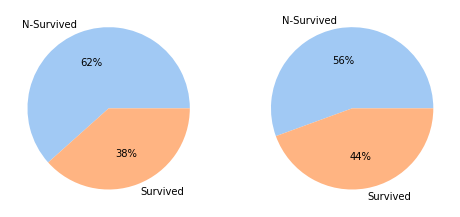

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(8,6))
colors = sns.color_palette('pastel')[0:2]
labels = ['N-Survived','Survived']
counts0 = [np.argwhere(y_train==0).shape[0],np.argwhere(y_train==1).shape[0]]
counts1 = [np.argwhere(y_res==0).shape[0],np.argwhere(y_res==1).shape[0]]
ax[0].pie(counts0, labels = labels, colors = colors, autopct='%.0f%%')
ax[1].pie(counts1, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# **Segmentação pós-balanceamento**

Nesta seção apenas criamos o DataFrame dos dados do balanceamento, removendo as variáveis Parch e SibSp que não entrarão no modelo final.

In [ ]:
train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Parentes', 'HasFamily', 'Fare_per_Passenger', 'Age_Class',
       'Fare_Class', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age_Class_1', 'Age_Class_2', 'Age_Class_3',
       'Age_Class_4', 'Fare_Class_1', 'Fare_Class_2', 'Fare_Class_3',
       'Fare_Class_4', 'Survived'],
      dtype='object')

In [ ]:
X_res_df = pd.DataFrame(X_res,columns=train.drop('Survived',axis=1).columns)

In [ ]:
X_res_df.head()

,Pclass,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Parentes,HasFamily,...,Embarked_Q,Embarked_S,Age_Class_1,Age_Class_2,Age_Class_3,Age_Class_4,Fare_Class_1,Fare_Class_2,Fare_Class_3,Fare_Class_4
0,3.0,-0.592052,1.0,0.0,7.2500,0.0,0.0,1.0,2.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.597848,1.0,0.0,71.2833,1.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3.0,-0.294577,0.0,0.0,7.9250,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.374742,1.0,0.0,53.1000,1.0,0.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.374742,0.0,0.0,8.0500,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train = X_res_df.drop(['SibSp','Parch'],axis=1)
X_test = test.drop(['SibSp','Parch'],axis=1)

In [ ]:
X_train['Survived'] = y_res

In [ ]:
X_train = X_train.sample(frac=1).reset_index(drop=True)

In [ ]:
y_train = X_train['Survived']
X_train.drop('Survived',axis=1,inplace=True)

# **Redução de Dimensionalidade**

**Testaremos três técnicas de análises de correspondência e redução de dimensionalidade para a tarefa posterior de classificação.**

## **Redução de dimensionalidade (MCA)**

**:Agora, com a intenção de reduzir a dimensionalidade dos atributos categóricos vamos aplicar a análise de correspondência múltipla.**

In [ ]:
X_train['Survived'] = y_train

In [ ]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Parentes',
       'HasFamily', 'Fare_per_Passenger', 'Age_Class', 'Fare_Class',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Age_Class_1', 'Age_Class_2', 'Age_Class_3', 'Age_Class_4',
       'Fare_Class_1', 'Fare_Class_2', 'Fare_Class_3', 'Fare_Class_4',
       'Survived'],
      dtype='object')

In [ ]:
for feature in X_train[['Pclass_3','Embarked_S','Sex_male','Fare_Class_1']]:
  X_train[feature] = [str(x) for x in X_train[feature]]
  X_test[feature] = [str(x) for x in X_test[feature]]

In [ ]:
X_train[['Pclass_3','Embarked_S','Sex_male','Fare_Class_1']].describe()

,Pclass_3,Embarked_S,Sex_male,Fare_Class_1
count,988,988,988,988
unique,2,2,2,2
top,1.0,1.0,1.0,0.0
freq,536,714,605,744


**Abaixo utilizamos algumas variáveis categóricas com boa probabilidade de associação para a análise de correspondência múltipla.**

In [ ]:
import prince
mca = prince.MCA(
     n_components=2,
     random_state=42
 )

mca = mca.fit(X_train[['Pclass_3','Sex_male','Fare_Class_3','Fare_Class_4']])
print(mca)

MCA(random_state=42)


In [ ]:
X_mca= mca.transform(X_train[['Pclass_3','Sex_male','Fare_Class_3','Fare_Class_4']])
X_mca_test= mca.transform(X_test[['Pclass_3','Sex_male','Fare_Class_3','Fare_Class_4']])
print(X_mca)

            0         1
0   -1.031570 -0.305565
1    0.699867  0.608778
2   -0.440115  1.175495
3    0.591197 -0.788855
4   -0.440115  1.175495
..        ...       ...
983  0.305564 -0.378595
984  0.591197 -0.788855
985 -0.440115  1.175495
986  0.985500  0.198518
987 -1.031570 -0.305565

[988 rows x 2 columns]


Na figura abaixo, é possível visualizar a representação dessas categorias em novas coordenadas. Esperamos que haja alguma correlação entre a probabilidade de sobrevivência e essas novas variáveis.

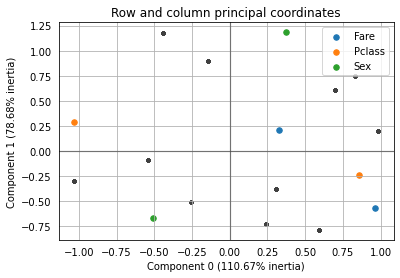

In [ ]:
fig,ax = plt.subplots()
mca.plot_coordinates(X_train[['Pclass_3','Sex_male','Fare_Class_3','Fare_Class_4']],ax=ax)

In [ ]:
mca.eigenvalues_

[0.5533264817947792, 0.39341989566719754]

In [ ]:
mca.total_inertia_

0.5

In [ ]:
mca.explained_inertia_

[1.1066529635895583, 0.7868397913343951]

In [ ]:
X_mca

,0,1
0,-1.031570,-0.305565
1,0.699867,0.608778
2,-0.440115,1.175495
3,0.591197,-0.788855
4,-0.440115,1.175495
...,...,...
983,0.305564,-0.378595
984,0.591197,-0.788855
985,-0.440115,1.175495
986,0.985500,0.198518


In [ ]:
#X_mca['Age'] = [float(x) for x in X_res[:,2]] 
#X_mca['SibSp'] = [float(x) for x in X_res[:,3]] 
#X_mca['Parch'] = [float(x) for x in X_res[:,4]] 
#X_mca['Fare'] = [float(x) for x in X_res[:,5]] 
#X_mca['Survived'] = [float(y) for y in y_res]
#X_mca_test['Age'] = [float(x) for x in X_test[:,2]] 
#X_mca_test['SibSp'] = [float(x) for x in X_test[:,3]] 
#X_mca_test['Parch'] = [float(x) for x in X_test[:,4]] 
#X_mca_test['Fare'] = [float(x) for x in X_test[:,5]] 

X_train['MCA_0'] = X_mca[0]
X_test['MCA_0'] = X_mca_test[0]
X_train['MCA_1'] = X_mca[1]
X_test['MCA_1'] = X_mca_test[1]

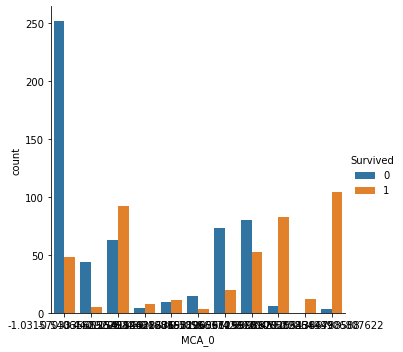

In [ ]:
from matplotlib import axes
sns.catplot(x ="MCA_0", hue ="Survived",
kind ="count", data = X_train)

In [ ]:
for x in ['Pclass_3','Embarked_S','Sex_male','Fare_Class_3','Fare_Class_4']:
  X_train[x] = [int(float(y)) for y in X_train[x]]
  X_test[x]  = [int(float(y)) for y in X_test[x]]

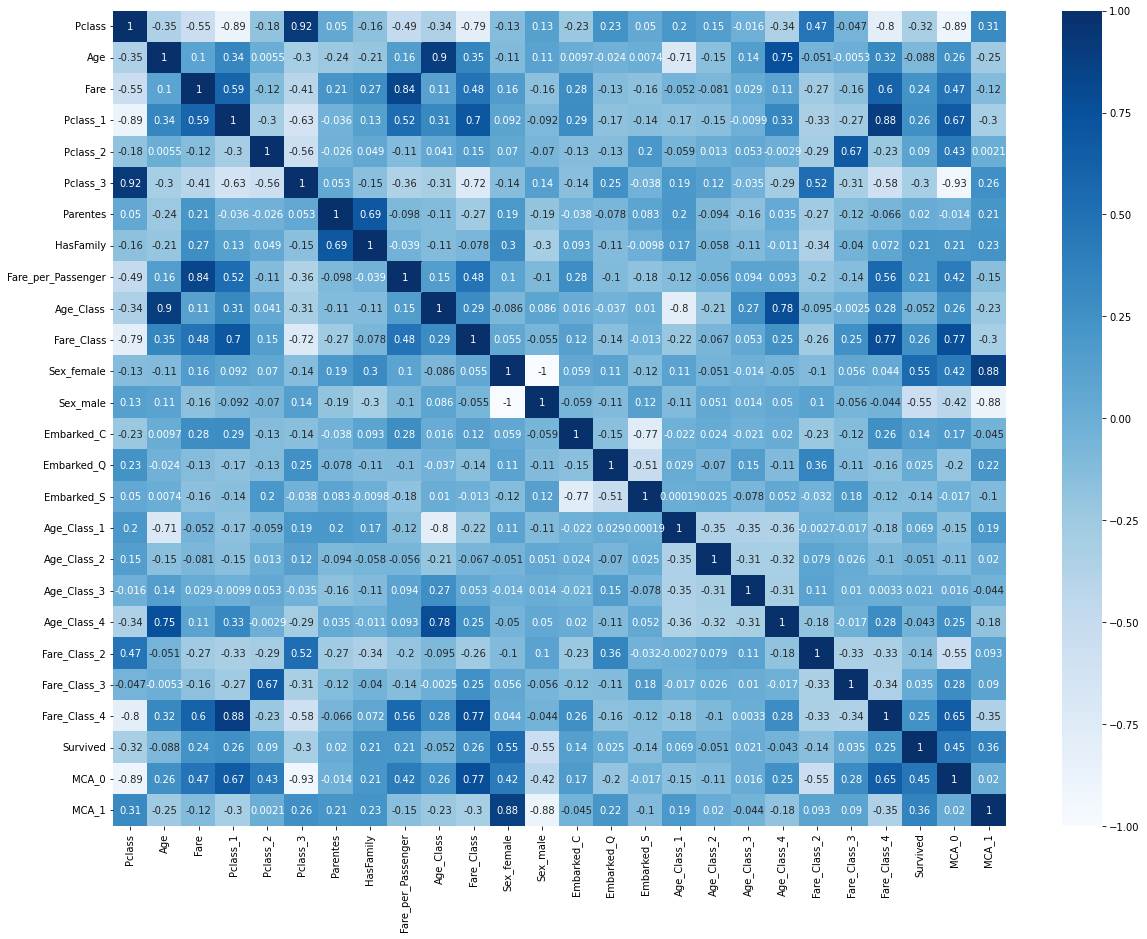

In [ ]:
corr = X_train.corr()
fig,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

Vemos que a componente 0 tem uma correlação de 47% com a variável resposta, enquanto a componente 1 37%. Abaixo, vemos as distribuições dessas variáveis.

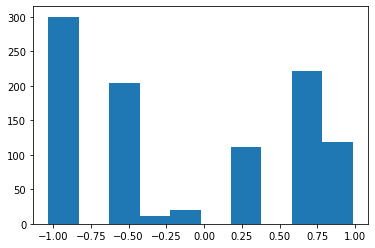

In [ ]:
plt.hist(X_train['MCA_0'])
plt.show()

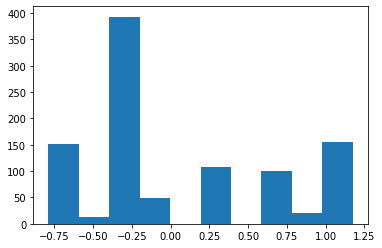

In [ ]:
plt.hist(X_train['MCA_1'])
plt.show()

In [ ]:
X_train.loc[:,['MCA_0_Normalized','MCA_1_Normalized']] = scaler.fit_transform(X_train[['MCA_0','MCA_1']])
X_test.loc[:,['MCA_0_Normalized','MCA_1_Normalized']] = scaler.fit_transform(X_test[['MCA_0','MCA_1']])

Os boxplots abaixo mostram a faixa de valores de cada uma das novas variáveis por classe de sobrevivência. Vemos que as médias tem valores diferentes, o que pode ser útil na classificação.

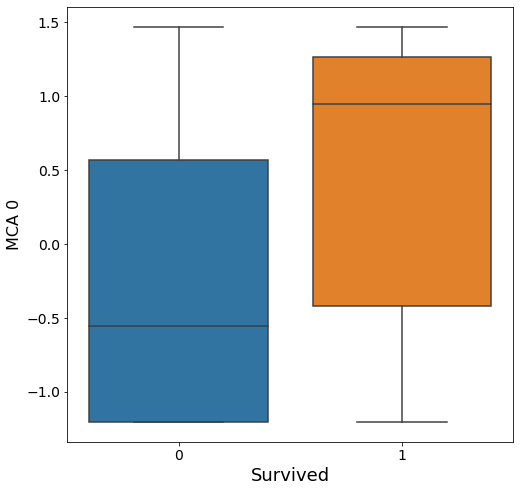

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Survived',y='MCA_0_Normalized',data=X_train)
plt.xlabel('Survived', fontsize=18)
plt.ylabel('MCA 0', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

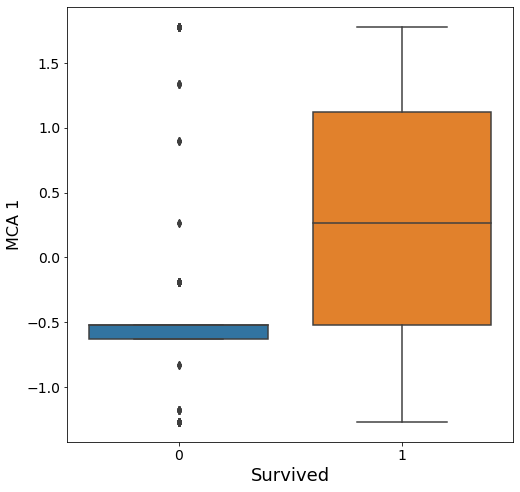

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Survived',y='MCA_1_Normalized',data=X_train)
plt.xlabel('Survived', fontsize=18)
plt.ylabel('MCA 1', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## **Redução de dimensionalidade (MFA)**

Agora testaremos um método mais genérico que o MCA, o MFA (Multiple Factor Analysis), no qual os MCA's são feitos em grupos e um PCA é feito ao final.

In [ ]:
X_train['Survived'] = y_train

In [ ]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Parentes',
       'HasFamily', 'Fare_per_Passenger', 'Age_Class', 'Fare_Class',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Age_Class_1', 'Age_Class_2', 'Age_Class_3', 'Age_Class_4',
       'Fare_Class_1', 'Fare_Class_2', 'Fare_Class_3', 'Fare_Class_4',
       'Survived', 'MCA_0', 'MCA_1', 'MCA_0_Normalized', 'MCA_1_Normalized'],
      dtype='object')

In [ ]:
#train.drop(['Fare_Range','Age_Range'])

In [ ]:
for x in ['Pclass_3','Sex_male','Fare_Class_1','Fare_Class_2','Pclass_1','Sex_female','Fare_Class_3','Fare_Class_4']:
  X_train[x] = [str(y) for y in X_train[x]]
  X_test[x]  = [str(y) for y in X_test[x]]

In [ ]:
groups = {'NSurvived':['Pclass_3','Sex_male','Fare_Class_1','Fare_Class_2'],'Survived':['Pclass_1','Sex_female','Fare_Class_3','Fare_Class_4']}

In [ ]:
import prince
mfa = prince.MFA(
     groups=groups,
     n_components=2,
     random_state=42
 )

mfa = mfa.fit(X_train[['Pclass_3','Sex_male','Fare_Class_1','Fare_Class_2','Pclass_1','Sex_female','Fare_Class_3','Fare_Class_4']])
print(mfa)

MFA(groups={'NSurvived': ['Pclass_3', 'Sex_male', 'Fare_Class_1',
                          'Fare_Class_2'],
            'Survived': ['Pclass_1', 'Sex_female', 'Fare_Class_3',
                         'Fare_Class_4']},
    random_state=42)


In [ ]:
X_mfa= mfa.transform(X_train[['Pclass_3','Sex_male','Fare_Class_1','Fare_Class_2','Pclass_1','Sex_female','Fare_Class_3','Fare_Class_4']])
X_mfa_test= mfa.transform(X_test[['Pclass_3','Sex_male','Fare_Class_1','Fare_Class_2','Pclass_1','Sex_female','Fare_Class_3','Fare_Class_4']])
print(X_mfa)

            0         1
0   -1.193085 -0.305104
1    0.773164  1.341907
2   -0.534574  1.630391
3    1.520208 -1.463677
4   -0.695882  1.273272
..        ...       ...
983  0.114653 -0.593587
984  1.520208 -1.463677
985 -0.534574  1.630391
986  2.178719  0.471817
987 -1.193085 -0.305104

[988 rows x 2 columns]


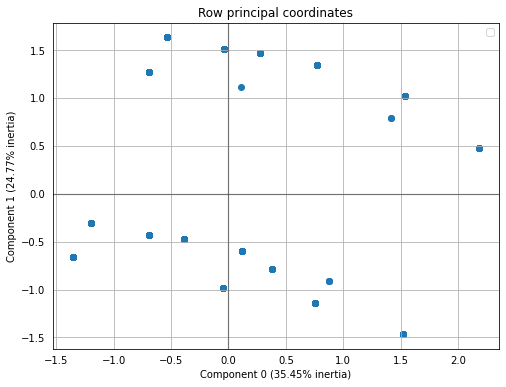

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
mfa.plot_row_coordinates(X_train[['Pclass_3','Sex_male','Fare_Class_1','Fare_Class_2','Pclass_1','Sex_female','Fare_Class_3','Fare_Class_4']],ax=ax)

In [ ]:

#plt.scatter(train['Fare_Class_1'],train['Survived'])

In [ ]:
mfa.eigenvalues_

array([0.00148052, 0.00103457])

In [ ]:
mfa.total_inertia_

0.004176086701929867

In [ ]:
mfa.explained_inertia_

array([0.35452218, 0.24773625])

In [ ]:
#X_mca['Age'] = [float(x) for x in X_res[:,2]] 
#X_mca['SibSp'] = [float(x) for x in X_res[:,3]] 
#X_mca['Parch'] = [float(x) for x in X_res[:,4]] 
#X_mca['Fare'] = [float(x) for x in X_res[:,5]] 
#X_mca['Survived'] = [float(y) for y in y_res]
#X_mca_test['Age'] = [float(x) for x in X_test[:,2]] 
#X_mca_test['SibSp'] = [float(x) for x in X_test[:,3]] 
#X_mca_test['Parch'] = [float(x) for x in X_test[:,4]] 
#X_mca_test['Fare'] = [float(x) for x in X_test[:,5]] 

X_train['MFA_0'] = X_mfa[0]
X_test['MFA_0'] = X_mfa_test[0]
X_train['MFA_1'] = X_mfa[1]
X_test['MFA_1'] = X_mfa_test[1]

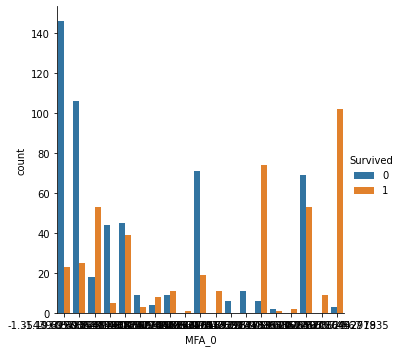

In [ ]:
from matplotlib import axes
sns.catplot(x ="MFA_0", hue ="Survived",
kind ="count", data = X_train)

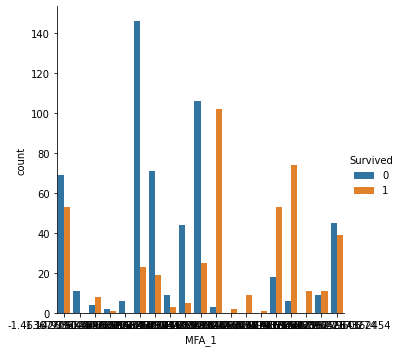

In [ ]:
from matplotlib import axes
sns.catplot(x ="MFA_1", hue ="Survived",
kind ="count", data = X_train)

In [ ]:
for x in ['Pclass_3','Sex_male','Fare_Class_1','Fare_Class_2','Pclass_1','Sex_female','Fare_Class_3','Fare_Class_4']:
  X_train[x] = [int(float(y)) for y in X_train[x]]
  X_test[x]  = [int(float(y)) for y in X_test[x]]

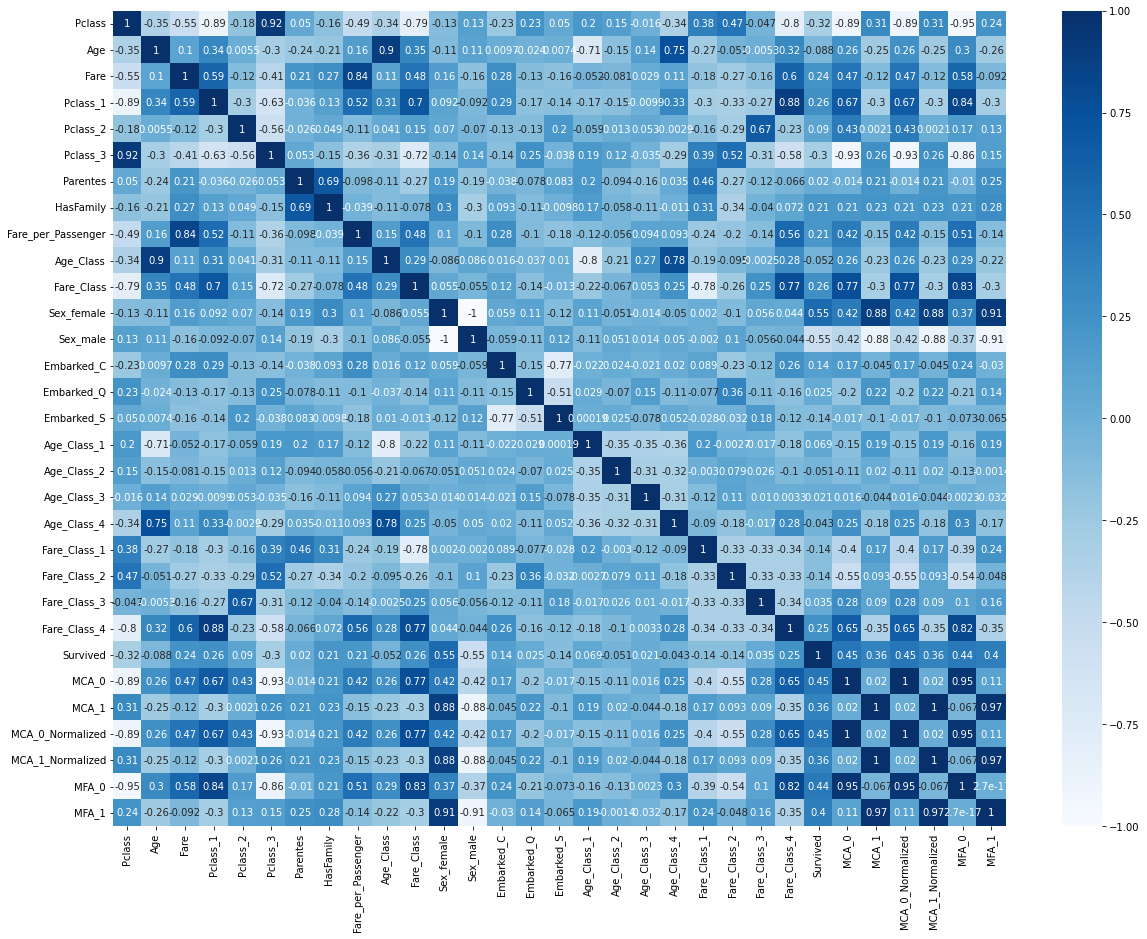

In [ ]:
corr = X_train.corr()
fig,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

Ambas as variáveis contém aproximadamente 40% de correlação com a variável sobrevivência, Abaixo vemos sua distribuição e os boxplots.

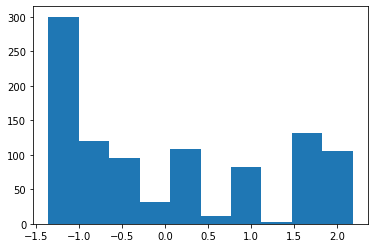

In [ ]:
plt.hist(X_train['MFA_0'])
plt.show()

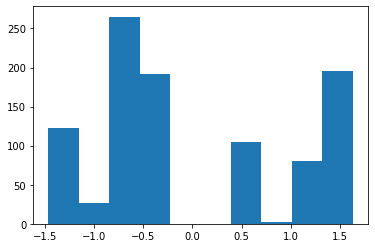

In [ ]:
plt.hist(X_train['MFA_1'])
plt.show()

In [ ]:
X_train.loc[:,['MFA_0_Normalized','MFA_1_Normalized']] = scaler.fit_transform(X_train[['MFA_0','MFA_1']])
X_test.loc[:,['MFA_0_Normalized','MFA_1_Normalized']] = scaler.fit_transform(X_test[['MFA_0','MFA_1']])

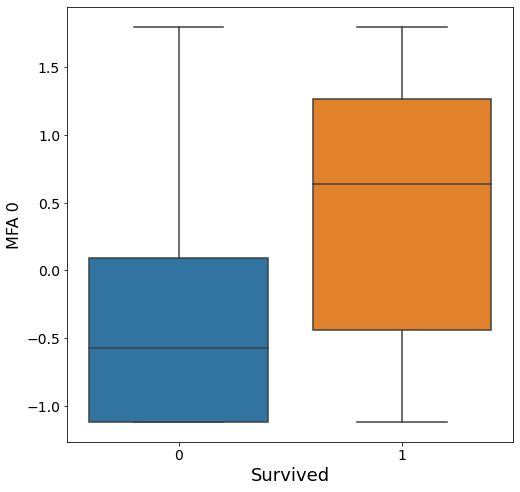

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Survived',y='MFA_0_Normalized',data=X_train)
plt.xlabel('Survived', fontsize=18)
plt.ylabel('MFA 0', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

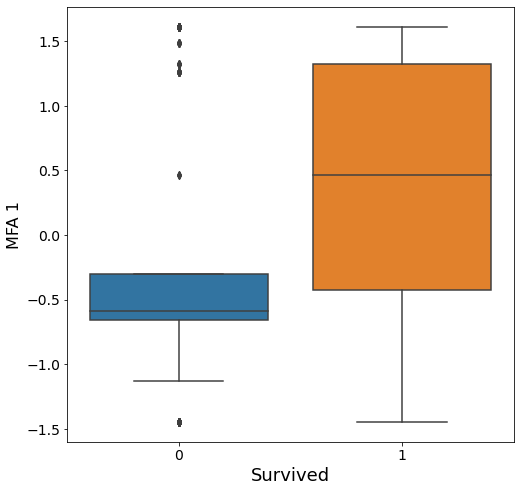

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Survived',y='MFA_1_Normalized',data=X_train)
plt.xlabel('Survived', fontsize=18)
plt.ylabel('MFA 1', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## **ART-Net**

Usaremos agora um método de Clustering com redes ART-Net, baseadas no princípio de Ressonância Adaptativa.

In [ ]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Parentes',
       'HasFamily', 'Fare_per_Passenger', 'Age_Class', 'Fare_Class',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Age_Class_1', 'Age_Class_2', 'Age_Class_3', 'Age_Class_4',
       'Fare_Class_1', 'Fare_Class_2', 'Fare_Class_3', 'Fare_Class_4',
       'Survived', 'MCA_0', 'MCA_1', 'MCA_0_Normalized', 'MCA_1_Normalized',
       'MFA_0', 'MFA_1', 'MFA_0_Normalized', 'MFA_1_Normalized'],
      dtype='object')

In [ ]:
!pip install neupy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ART_train = X_train[['Sex_male','Sex_female','Embarked_C','Embarked_S','Embarked_Q','Pclass_1','Pclass_2','Pclass_3','Fare_Class_1','Fare_Class_2','Fare_Class_3','Fare_Class_4','Age_Class_1', 'Age_Class_2',
       'Age_Class_3', 'Age_Class_4']]
ART_test = X_test[['Sex_male','Sex_female','Embarked_C','Embarked_S','Embarked_Q','Pclass_1','Pclass_2','Pclass_3','Fare_Class_1','Fare_Class_2','Fare_Class_3','Fare_Class_4','Age_Class_1', 'Age_Class_2',
       'Age_Class_3', 'Age_Class_4']]

In [ ]:
from neupy import algorithms

In [ ]:
artnet = algorithms.ART1(step=0.1,rho=0.7,n_clusters=2,verbose=False )

In [ ]:
pred = artnet.predict(ART_train)

In [ ]:
X_train['ART-1'] = pred
X_test['ART-1'] = artnet.predict(ART_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


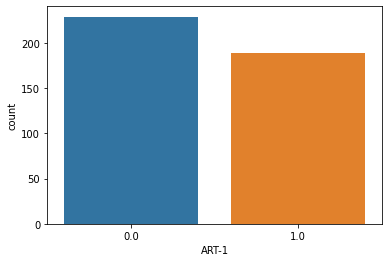

In [ ]:
sns.countplot(X_test['ART-1'])

In [ ]:
X_train['Survived'] = y_train

O que temos é a criação de duas novas categorias, sendo possível a classificação diretamente por essa predição ou uso apenas como uma nova variável. Usaremos esses clusters como variáveis nos modelos.

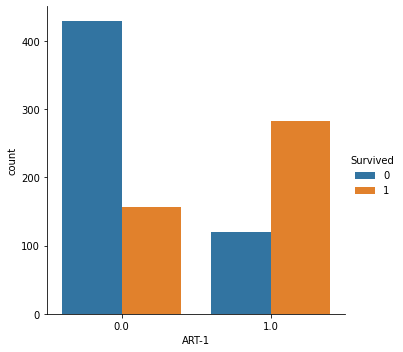

In [ ]:
sns.catplot(x ="ART-1", hue ="Survived",
kind ="count", data = X_train)

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
confusion_matrix(y_train,pred)

array([[429, 120],
       [156, 283]])

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
print('Mutual information score:', 
      normalized_mutual_info_score(X_train['ART-1'], X_train['Survived'], average_method='arithmetic'))

Mutual information score: 0.1396516649030096


# **Seleção e Ajuste do Modelo, Comparações**

Nesta seção serão propostos diferentes modelos de classificação.

## **KNN**

In [ ]:
KNN0_train = X_train[['MFA_0_Normalized','MFA_1_Normalized','MCA_0_Normalized','MCA_1_Normalized','ART-1','Age','Fare_per_Passenger']]

In [ ]:
KNN0_test = X_test[['MFA_0_Normalized','MFA_1_Normalized','MCA_0_Normalized','MCA_1_Normalized','ART-1','Age','Fare_per_Passenger']]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = [{'n_neighbors': np.arange(1, 51), 
               'metric': ['euclidean', 'minkowski','chebyshev']}]

# defining parameter range
model = GridSearchCV(estimator = knn, param_grid = param_grid, cv=10, 
                    scoring='roc_auc', return_train_score=False,verbose=1)
  
# fitting the model for grid search
model.fit(np.array(KNN0_train), np.array(y_train))
print(model.best_params_)
model.score(np.array(KNN0_train), np.array(y_train))

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
{'metric': 'chebyshev', 'n_neighbors': 10}


0.9201488728730224

In [ ]:
pred = pd.DataFrame()
pred['PassengerId'] = PassId_test
pred['Survived'] = [int(x) for x in model.predict(np.array(KNN0_test))]

In [ ]:
pred.to_csv("KNN.csv",index=False)

Resultado:  **Acurácia:  0.7799**

## **Random Forest**

Melhor n: 16  AUC: 0.8455616239918566


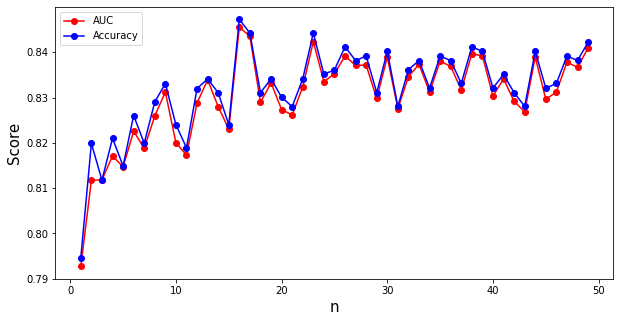

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
mauc = []
macc = []
vn = []
for n in range(1, 50):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(KNN0_train, y_train):
        x_t, x_validation = np.array(KNN0_train)[train_index], np.array(KNN0_train)[test_index]
        y_t, y_validation = np.array(y_train)[train_index], np.array(y_train)[test_index]

        model = RandomForestClassifier(n_estimators=n)
        model.fit(x_t,y_t)
        y_pred = model.predict(x_validation) 
        score = accuracy_score(y_pred, y_validation)

        vauc.append(roc_auc_score(y_validation, y_pred))
        vacc.append(accuracy_score(y_pred, y_validation))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vn.append(n)
best_n = np.argmax(mauc)+1
print('Melhor n:', best_n, ' AUC:',mauc[best_n-1])
plt.figure(figsize=(10,5))
plt.plot(vn, mauc, '-ro', label= 'AUC')
plt.plot(vn, macc, '-bo', label = 'Accuracy')
plt.xlabel('n', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
model =  RandomForestClassifier(n_estimators=best_n).fit(KNN0_train,y_train)

In [ ]:
model.feature_importances_

array([0.04066515, 0.10360235, 0.0608268 , 0.18951475, 0.00619285,
       0.33208015, 0.26711794])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


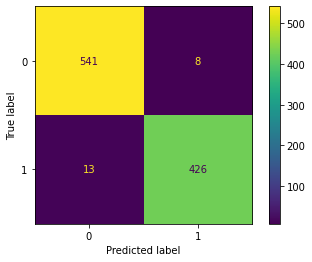

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(model, KNN0_train, y_train) 

In [ ]:
pred = pd.DataFrame()
pred['PassengerId'] = PassId_test
pred['Survived'] = [int(x) for x in model.predict(KNN0_test)]

In [ ]:
pred.to_csv("RF.csv",index=False)

Resultado: **Acurácia: 0.7488**

## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(KNN0_train, y_train)

GaussianNB()

In [ ]:
model.score(KNN0_train,y_train)

0.7601214574898786

In [ ]:
pred = pd.DataFrame()
pred['PassengerId'] = PassId_test
pred['Survived'] = [int(x) for x in model.predict(KNN0_test)]

In [ ]:
pred.to_csv("NB.csv",index=False)

Resultado: **Acurácia: 0.69617**

## **MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
param_grid = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [42]}


clf = MLPClassifier().fit(X_train,y_train)
model = GridSearchCV(estimator = clf, param_grid = param_grid, cv=10, 
                    scoring='roc_auc', return_train_score=False,verbose=1)

model.fit(KNN0_train,y_train)
print(model.best_params_)
model.score(KNN0_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'hidden_layer_sizes': (10, 5), 'max_iter': 3000, 'random_state': 42}


0.8841463667633428

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


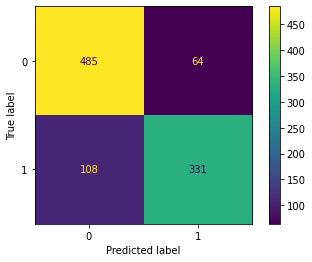

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(model, KNN0_train, y_train) 

In [ ]:
pred = pd.DataFrame()
pred['PassengerId'] = PassId_test
pred['Survived'] = [int(x) for x in model.predict(KNN0_test)]

In [ ]:
pred.to_csv("MLP.csv",index=False)

Resultado: **Acurácia: 0.78468**

## **Regressão Logística**

Inicialmente, é proposto um modelo de regressão logística para a classificação dos dados.

In [ ]:
log_train = KNN0_train
log_y_train = np.array(y_train)

In [ ]:
log_test = KNN0_test

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=42).fit(log_train,log_y_train)

In [ ]:
model.coef_

array([[ 1.81934527,  0.84274539, -0.69294267, -0.00720391,  0.69008785,
        -0.43169178,  0.16602285]])

In [ ]:
pred = pd.DataFrame()
pred['PassengerId'] = PassId_test
pred['Survived'] = [int(x) for x in model.predict(log_test)]

In [ ]:
model.score(log_train,log_y_train)

0.8026315789473685

In [ ]:
pred.to_csv("logistic.csv",index=False)

Resultados: **Acurácia - 0.739**

# **Discussão e Conclusões**


**Observamos que a maior acurácia foi para o método MLPClassifier, com mais de 78% de acurácia. Enquanto o método KNN e RandomForest vêm em seguida, com 77.9% e 74%.**

Como o critério utilizado no Kaggle é acurácia no conjunto teste, utilizaremos aqui esse critério para escolher o modelo MLPClassifier como o mais apropriado. Futuros testes podem ser feitos com outras opções de variáveis para a etapa de redução de dimensionalidade, de forma a criar categorias que estejam mais correlacionadas com a variável resposta. 